# PCA (Principal Component Analysis)

*   Unsupervised Learning Technique
*   Generally used for dimensionality reduction
*   Also useful in applications such as
    *   visualization of high-dimensional data,
    *   noise filtering
    *   feature extraction and feature engineering
*   PCA performs linear dimensionality reduction using SVD (Singular Value Decomposition) of the data to project it to a lower dimensional space. Source: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Resources:
*   https://www.youtube.com/watch?v=FgakZw6K1QQ
*   https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
*   https://github.com/StatQuest/pca_demo/blob/master/pca_demo.py
*   Plot 3D data: https://jakevdp.github.io/mpl_tutorial/tutorial_pages/tut5.html
*   Plotting in 3D: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html







# Canonical Correlation Analysis (CCA)

*   Useful in situations similar to multiple regression but CCA can also handle situations where there are multiple intercorrelated outcome variables.
*   CCA outputs a set of canonical variates, orthogonal linear combinations of the variables within each set that best explain the variability both within and between sets.
*   Example. A researcher has collected data on three psychological variables, four academic variables (standardized test scores) and gender for 600 college freshman. She is interested in how the set of psychological variables relates to the academic variables and gender. In particular, the researcher is interested in how many dimensions (canonical variables) are necessary to understand the association between the two sets of variables.

Source: https://stats.idre.ucla.edu/stata/dae/canonical-correlation-analysis/#:~:text=Examples%20of%20canonical%20correlation%20analysis,the%20academic%20variables%20and%20gender.

In [11]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cross_decomposition import CCA
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import datasets

# Example using Iris dataset

A scatter plot between the sepal length and the sepal width is plotted to visualise the iris dataset.

In [12]:
colors = ['blue', 'red', 'green']

iris = datasets.load_iris()
X = iris.data
y = iris.target
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
iris_species = ["Setosa", "Versicolour", "Virginica"]

dataset = pd.DataFrame(X, columns=names)
dataset
#y

sepal-length  sepal-width  petal-length  petal-width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

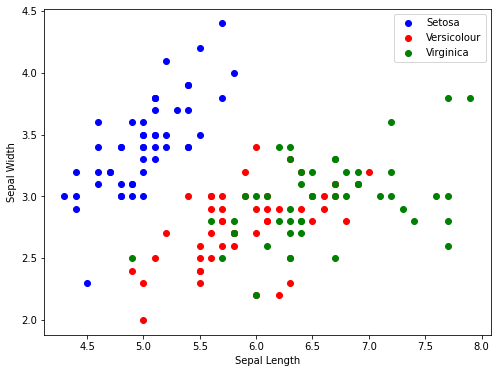

In [13]:
fig = plt.figure(figsize = (8,6))
for i in range(len(colors)):
    px = X[:,0][y==i]
    py = X[:,1][y==i]
    plt.scatter(px, py, c=colors[i])
plt.legend(iris_species)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()
plt.close(fig)

We see that the separation between the blue dots(setosa) and red(versicolor) and green dots(virginica) is quite clear, while separating red dots from green dots seems a very difficult task given the two features available.

We visualise the data on different features: petal width and petal length.

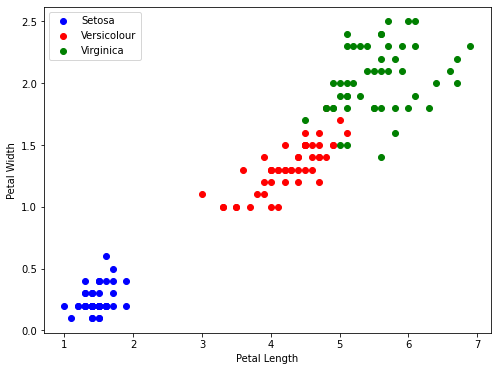

In [14]:
fig = plt.figure(figsize = (8,6))
for i in range(len(colors)):
    px = X[:,2][y==i]
    py = X[:,3][y==i]
    plt.scatter(px, py, c=colors[i])
plt.legend(iris_species)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()
plt.close(fig)

In this case, the decision boundary between the green and the red dots can be easily determined.

Therefore, using the important features for training is a good choice. We use dimensionality reduction to reduce our input dimension (no. of features) so as to extract the important features of the input.

# Dimensionality Reduction

We will use PCA (Principal Component Analysis) for dimensionality reduction.

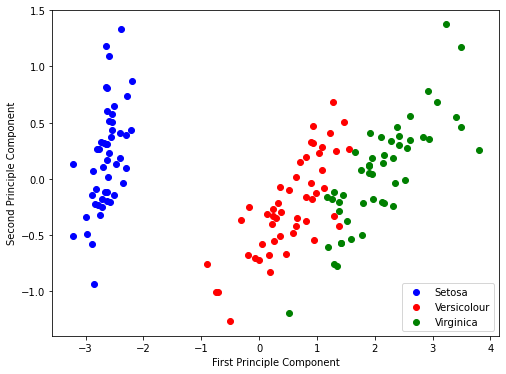

In [15]:
# Visualizing the principal components using PCA

# Linear PCA
est = PCA(n_components=2)
x_pca = est.fit_transform(X)

plt.figure(figsize=[8, 6])
for i in range(len(colors)):
    px = x_pca[:,0][y==i]
    py = x_pca[:,1][y==i]
    plt.scatter(px, py, c=colors[i])
plt.legend(iris_species)
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
plt.show()
plt.close()

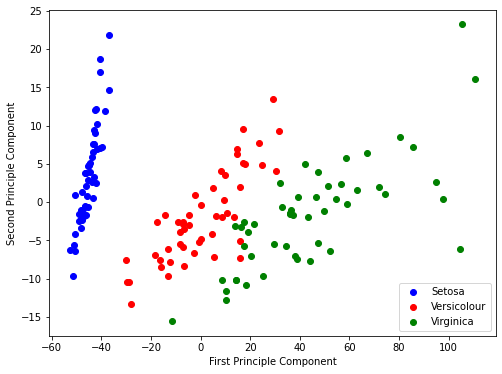

In [16]:
# Visualizing the principal components using different Kernel PCA

# Polynomial Kernel
est = KernelPCA(n_components=2, kernel='poly', degree=3)
x_pca = est.fit_transform(X)

plt.figure(figsize=[8, 6])
for i in range(len(colors)):
    px = x_pca[:,0][y==i]
    py = x_pca[:,1][y==i]
    plt.scatter(px, py, c=colors[i])
plt.legend(iris_species)
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
plt.show()
plt.close()

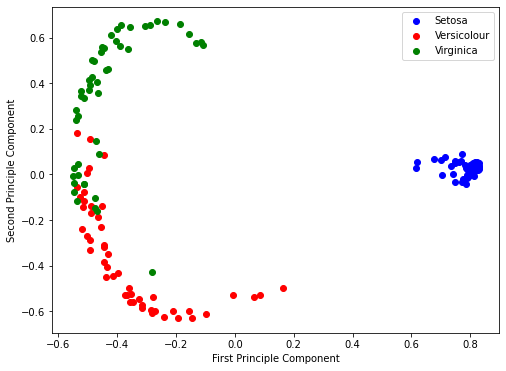

In [17]:
# Gaussian Kernel
est = KernelPCA(n_components=2, kernel='rbf')
x_pca = est.fit_transform(X)

plt.figure(figsize=[8, 6])
for i in range(len(colors)):
    px = x_pca[:,0][y==i]
    py = x_pca[:,1][y==i]
    plt.scatter(px, py, c=colors[i])
plt.legend(iris_species)
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
plt.show()
plt.close()

Automatically created module for IPython interactive environment


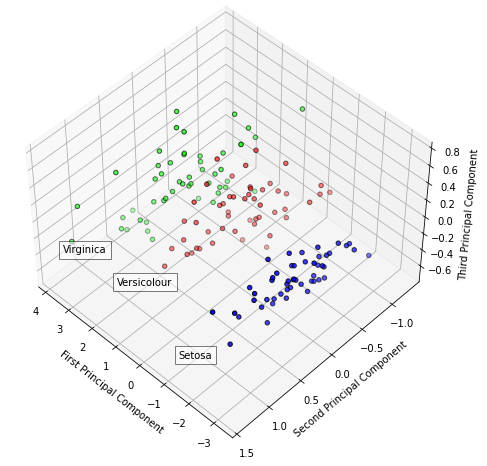

In [18]:
# PCA in 3 dimensions

print(__doc__)

# Code taken from: https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html
# Code source: Gaël Varoquaux
# License: BSD 3 clause

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]

fig = plt.figure(1, figsize=(8,6))
plt.clf()  # Clear current figure
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla() # Clear current axes
pca = PCA(n_components=3)
x_pca3D = pca.fit_transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(x_pca3D[y == label, 0].mean(),
              x_pca3D[y == label, 1].mean() + 1.5,
              x_pca3D[y == label, 2].mean(),
              name, horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='black', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y_new = np.choose(y, [0, 1, 2]).astype(float)
ax.scatter(x_pca3D[:, 0], x_pca3D[:, 1], x_pca3D[:, 2], c=y_new, cmap='brg',
           edgecolor='k')

ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')

plt.show()

# Comparing PCA and CCA

Automatically created module for IPython interactive environment


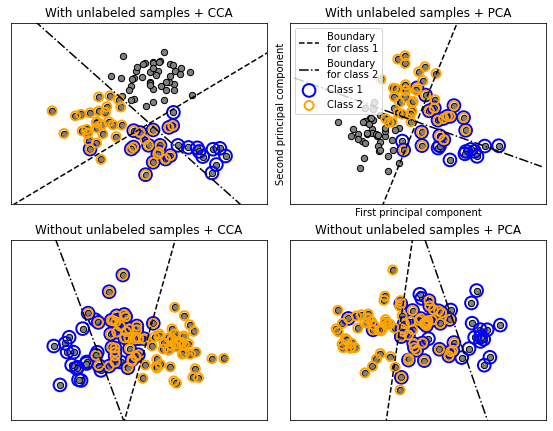

In [19]:
print(__doc__)

# Code taken from: https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_multilabel.html#sphx-glr-auto-examples-miscellaneous-plot-multilabel-py

from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC


def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 5, max_x + 5)  # make sure the line is long enough
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label)


def plot_subfigure(X, Y, subplot, title, transform):
    if transform == "pca":
        X = PCA(n_components=2).fit_transform(X)
    elif transform == "cca":
        X = CCA(n_components=2).fit(X, Y).transform(X)
    else:
        raise ValueError

    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])

    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])

    classif = OneVsRestClassifier(SVC(kernel='linear'))
    classif.fit(X, Y)

    plt.subplot(2, 2, subplot)
    plt.title(title)

    zero_class = np.where(Y[:, 0])
    one_class = np.where(Y[:, 1])
    plt.scatter(X[:, 0], X[:, 1], s=40, c='gray', edgecolors=(0, 0, 0))
    plt.scatter(X[zero_class, 0], X[zero_class, 1], s=160, edgecolors='b',
                facecolors='none', linewidths=2, label='Class 1')
    plt.scatter(X[one_class, 0], X[one_class, 1], s=80, edgecolors='orange',
                facecolors='none', linewidths=2, label='Class 2')

    plot_hyperplane(classif.estimators_[0], min_x, max_x, 'k--',
                    'Boundary\nfor class 1')
    plot_hyperplane(classif.estimators_[1], min_x, max_x, 'k-.',
                    'Boundary\nfor class 2')
    plt.xticks(())
    plt.yticks(())

    plt.xlim(min_x - .5 * max_x, max_x + .5 * max_x)
    plt.ylim(min_y - .5 * max_y, max_y + .5 * max_y)
    if subplot == 2:
        plt.xlabel('First principal component')
        plt.ylabel('Second principal component')
        plt.legend(loc="upper left")


plt.figure(figsize=(8, 6))

X, Y = make_multilabel_classification(n_classes=2, n_labels=1,
                                      allow_unlabeled=True,
                                      random_state=1)

plot_subfigure(X, Y, 1, "With unlabeled samples + CCA", "cca")
plot_subfigure(X, Y, 2, "With unlabeled samples + PCA", "pca")

X, Y = make_multilabel_classification(n_classes=2, n_labels=1,
                                      allow_unlabeled=False,
                                      random_state=1)

plot_subfigure(X, Y, 3, "Without unlabeled samples + CCA", "cca")
plot_subfigure(X, Y, 4, "Without unlabeled samples + PCA", "pca")

plt.subplots_adjust(.04, .02, .97, .94, .09, .2)
plt.show()